<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Ago18_19/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

Los datos son una colección de la anomalía en la temperatura global en comparación con la temperatura global promedio de 1951 a 1980.\
Los datos fueron obtenidos de https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/

In [53]:
#Los datos estan montados a una carpeta de Drive, usamos np.loadtxt para leerlos
file = '/content/drive/MyDrive/Machine_Learning/temperatura global.txt'
data = np.loadtxt(file)

In [55]:
x = data[:,0] #Creamos un arreglo con los datos de la columna 0 del arreglo data y lo definimos como x
y = data[:,1] #Creamos un arreglo con los datos de la columna 1 del arreglo data y lo definimos como y
x.reshape(len(x),1) #Lo cambiamos de la forma (n,1) a la forma (1,n) (vector columna)
y.reshape(len(x),1) #Lo cambiamos de la forma (n,1) a la forma (1,n) (vector columna)

array([[-0.17],
       [-0.09],
       [-0.11],
       [-0.18],
       [-0.29],
       [-0.34],
       [-0.32],
       [-0.37],
       [-0.18],
       [-0.11],
       [-0.36],
       [-0.23],
       [-0.28],
       [-0.32],
       [-0.32],
       [-0.24],
       [-0.11],
       [-0.11],
       [-0.27],
       [-0.18],
       [-0.08],
       [-0.15],
       [-0.28],
       [-0.37],
       [-0.47],
       [-0.26],
       [-0.22],
       [-0.38],
       [-0.43],
       [-0.49],
       [-0.44],
       [-0.44],
       [-0.36],
       [-0.34],
       [-0.15],
       [-0.14],
       [-0.36],
       [-0.46],
       [-0.3 ],
       [-0.28],
       [-0.27],
       [-0.19],
       [-0.28],
       [-0.26],
       [-0.27],
       [-0.22],
       [-0.11],
       [-0.21],
       [-0.2 ],
       [-0.36],
       [-0.16],
       [-0.09],
       [-0.16],
       [-0.28],
       [-0.12],
       [-0.2 ],
       [-0.14],
       [-0.03],
       [ 0.  ],
       [-0.01],
       [ 0.13],
       [ 0.19],
       [

$\omega = (X^{T}X)^{-1}X^{T}t$

Primero exploraremos una predicción lineal de la forma $y = \omega_{1} x + \omega_{0}$

In [34]:
#Definimos una función para calcular las funciones de peso w en modelo lineal
def w_matl(x,y):
  t = y #nuestra predicción es la misma colección de datos y (var. dependiente)
  X = np.vstack([np.ones_like(x),x]).T #creamos la matriz X transpuesta de forma (2,n)
  X_tX = np.matmul(X.T,X) #Multiplicamos las matrices X_t y X (2,2)
  invX_tX = np.linalg.inv(X_tX) #invertimos la matriz (X_tX)
  X_tt = np.matmul(X.T,t) #multiplicamos la transpuesta de X por t (n,1)
  w = np.matmul(invX_tX, X_tt) #finalmente obtenemos la matriz de peso w
  return w #la función nos devuelve la matriz de peso de (2,1)

Después exploraremos una predicción cuadrática de la forma $y = \omega_{2}x^{2}+\omega_{1}x+\omega_{0}$

In [35]:
#Definimos una función para calcular las funciones de peso w en modelo cuadrático
def w_matc(x,y):
  t = y #nuestra predicción es la misma colección de datos y (var. dependiente)
  X = np.vstack([np.ones_like(x),x,x**2]).T #creamos la matriz de la forma (3,n)
  X_tX = np.matmul(X.T,X) #Multiplicamos las matrices X_t y X
  invX_tX = np.linalg.inv(X_tX) #invertimos la matriz (X_tX)
  X_tt = np.matmul(X.T,t) #multiplicamos la transpuesta de X por t
  w = np.matmul(invX_tX, X_tt) #finalmente obtenemos la matriz de peso w
  return w #la función nos devuelve la matriz de peso (3,1)

**Usamos la colección de datos para comparar los modelos**

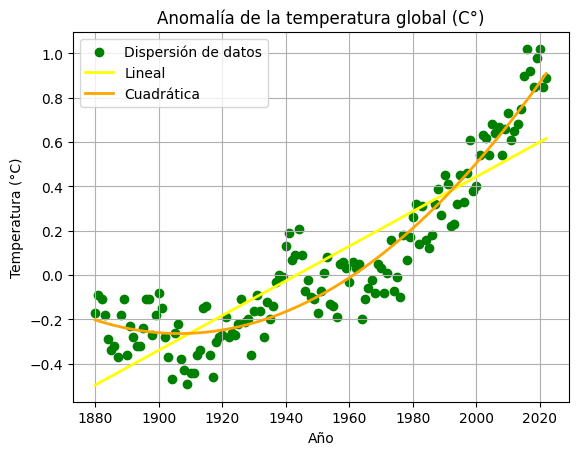

In [44]:
x_test = np.linspace(min(x),max(x),len(x)) #creamos una lista con el mismo número de datos que x, que va del mínimo de x al máximo de x
w_testl = w_matl(x,y) #evaluamos nuestra función lineal en los datos x,y que obtuvimos de NASA
f_testl = w_testl[0]+w_testl[1]*x_test #generamos nuestra función lineal
w_testc = w_matc(x,y) #evaluamos la función cuadrática en los datos x,y obtenimos de NASA
f_testc = w_testc[0]+w_testc[1]*x_test+w_testc[2]*x**2 #generamos la función cuadrática
plt.scatter(x,y, color = 'green', label = 'Dispersión de datos') #graficamos la dispersión de los datos originales
plt.plot(x_test,f_testl, color = 'yellow', label = 'Lineal', linewidth = 2) #graficamos la predicción lineal en color verde y tamaño de línea 2
plt.plot(x_test, f_testc, color = 'orange', label = 'Cuadrática', linewidth = 2) #graficamos la predicción cuadrática en color naranja y tamaño de línea 2
plt.grid() #superpone una cuadrícula
plt.title('Anomalía de la temperatura global (C°)')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend() #imprime las etiquetas de cada función en la gráfica

**Podemos observar que la predicción cuadrática se ajusta mejor a la dispersión de los datos! Por lo que el mejor modelo para describir la anomalía en la temperatura global es $y=\omega_{0}+\omega_{1}x+\omega_{2}x^{2}$**